#               Project Title:        'Exploratory Data Analysis using Pandas'

In [83]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Khushi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Khushi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Pre-processing

In [95]:
#importing the data set in tsv format
dataset=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [92]:
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,4,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,3,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [91]:
dataset.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [94]:
dataset.shape

(3150, 5)

In [89]:
#getting the information of dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [90]:
dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.453333,0.918413
std,1.068418,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [65]:
#checking for null values
dataset.isnull().sum()


rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [66]:
#total variation of products
a=dataset.variation.unique()

a1=pd.DataFrame(a, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], columns=['Products Name'])

print(a1)

                   Products Name
1                Charcoal Fabric
2                  Walnut Finish
3            Heather Gray Fabric
4               Sandstone Fabric
5                     Oak Finish
6                          Black
7                          White
8                     Black Spot
9                     White Spot
10                    Black Show
11                    White Show
12                    Black Plus
13                    White Plus
14  Configuration: Fire TV Stick
15                     Black Dot
16                     White Dot


## Feature Extraction

Black Dot                       516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black Plus                      270
Black Show                      265
Black                           261
Black Spot                      241
White Dot                       184
Heather Gray Fabric             157
White Spot                      109
White                            91
Sandstone Fabric                 90
White Show                       85
White Plus                       78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

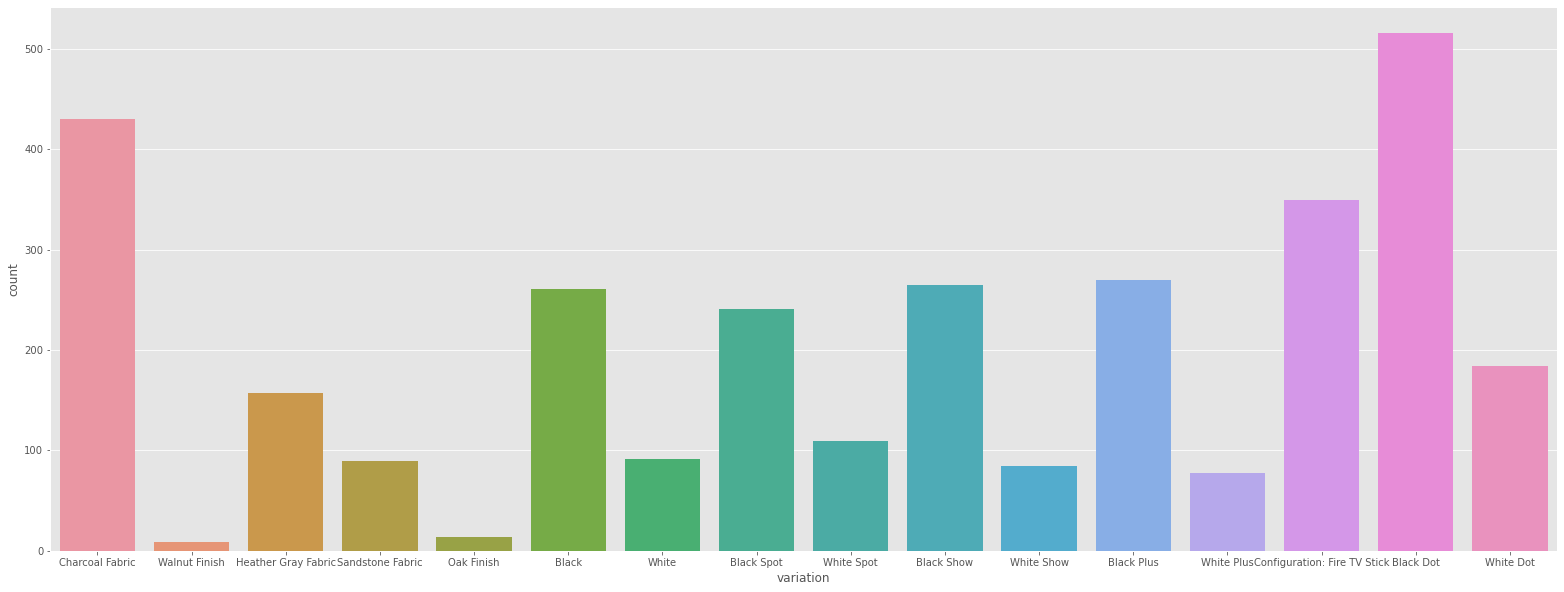

In [67]:
fig=plt.figure(figsize=(27,10))
sns.countplot(x='variation', data=dataset)
dataset['variation'].value_counts()

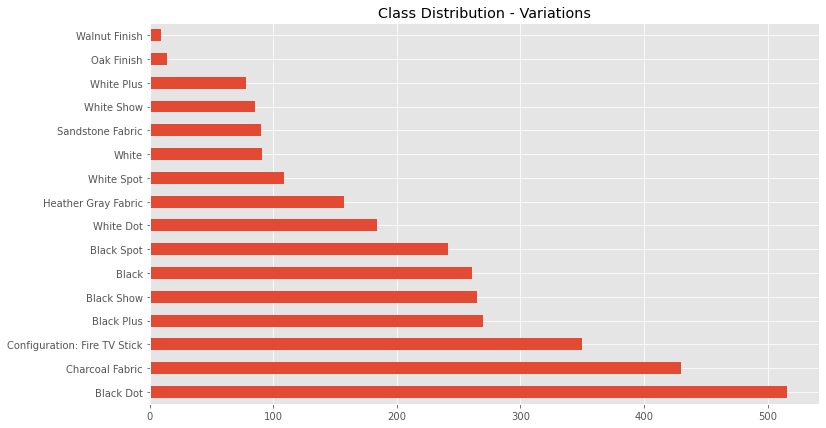

In [68]:
dataset.variation.value_counts().plot.barh(figsize=(12,7))
plt.title("Class Distribution - Variations");
 

### (i)Ratings 

In [97]:
#ratings given by no. of customers
dataset['rating'].value_counts()

5    2256
4     484
1     161
3     153
2      96
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

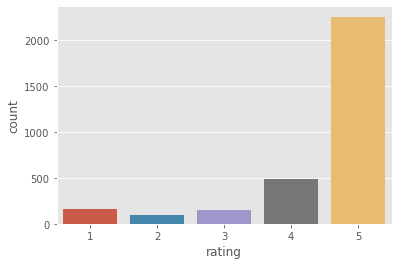

In [98]:
#countplot of ratings given by the customer
sns.countplot(x='rating', data=dataset)

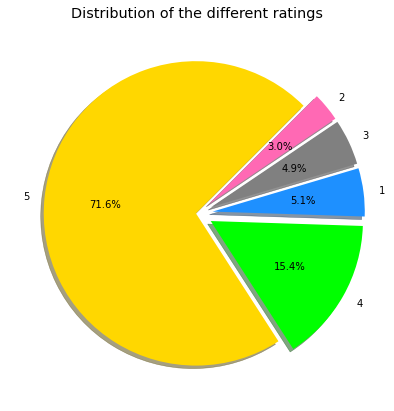

In [99]:
#pie chart showing distribution of different ratings
fig=plt.figure(figsize=(7,7))
tags=dataset['rating'].value_counts()
cols=['gold','lime','dodgerblue','grey','hotpink']
 
tags.plot(kind='pie',colors=cols,shadow=True, autopct='%1.1f%%',startangle=45, explode=(0.01,0.1,0.1,0.1,0.1), label='',)
plt.title("Distribution of the different ratings")
plt.show()

In [101]:
#ratings given by customers of a specific product/device
x=input("Enter the name of any Product: ")
dataset[dataset['variation']==x]['rating'].value_counts()

 

Enter the name of any Product: White


5    61
1    13
4    12
2     4
3     1
Name: rating, dtype: int64

### (ii)Feedback

In [73]:
#feedback given by no. of customers
dataset['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

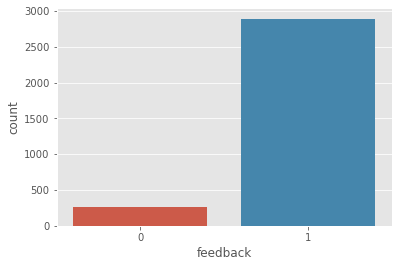

In [74]:
#countplot of feedback given by the customer
sns.countplot(x='feedback', data=dataset)
plt.show()

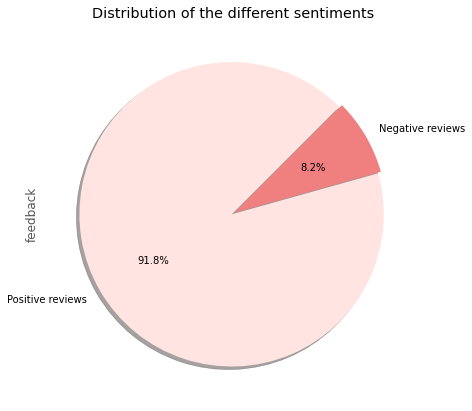

In [75]:
 #pie chart showing distribution of different feedbacks
fig = plt.figure(figsize=(7,7))
tags = dataset['feedback'].value_counts()
cols=['mistyrose','lightcoral']
feedback=['Positive reviews', 'Negative reviews']
tags.plot(kind='pie', colors=cols,shadow=True,startangle=45, explode=(0.01,0.01),autopct='%1.1f%%', labels=feedback)
plt.title("Distribution of the different sentiments")
plt.show()

In [102]:
 #feedback given by customers of a specific product/device
print("1 represents positive reviews and 0 represents negative reviews!")
y=input("Enter the name of any Product: ")
dataset[dataset['variation']==y]['feedback'].value_counts()



1 represents positive reviews and 0 represents negative reviews!
Enter the name of any Product: White


1    74
0    17
Name: feedback, dtype: int64

## Formation of Word clouds using ML Model

In [77]:
#feedback=1 represents positive reviews
pos_reviews = dataset[dataset.feedback==1]
pos_reviews.head(10)
 

,rating,date,variation,verified_reviews,feedback
0,4,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,3,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


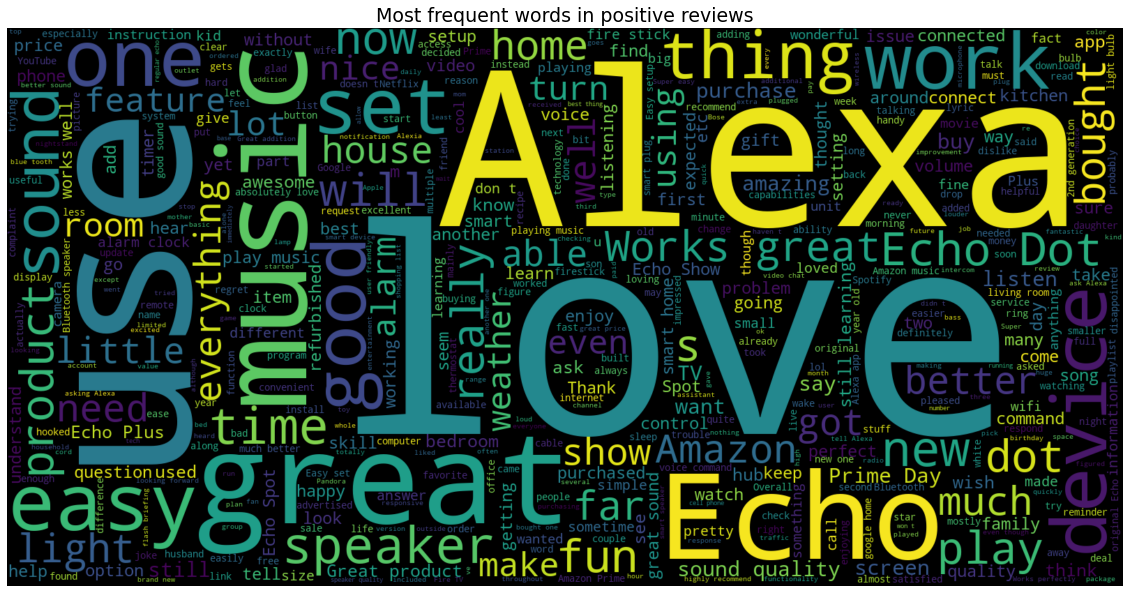

In [78]:
text = ' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

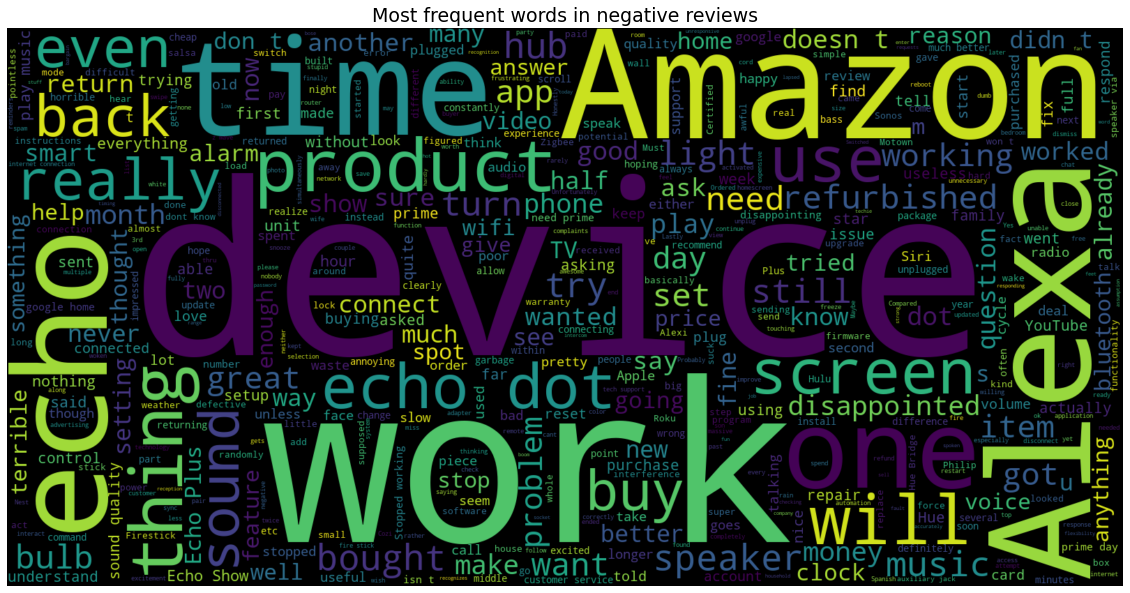

In [79]:
#feedback=0 represents negative reviews
neg_reviews = dataset[dataset.feedback==0]
text = ' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

## Overall Conclusion of Data analysis


Here is the list of devices:

                   Products Name
1                Charcoal Fabric
2                  Walnut Finish
3            Heather Gray Fabric
4               Sandstone Fabric
5                     Oak Finish
6                          Black
7                          White
8                     Black Spot
9                     White Spot
10                    Black Show
11                    White Show
12                    Black Plus
13                    White Plus
14  Configuration: Fire TV Stick
15                     Black Dot
16                     White Dot 

Enter the device name:Charcoal Fabric
Enter *R* for rating info and *F* for review info!:R

         No. of Ratings
Ratings                
5                   335
4                    72
3                    11
2                     8
1                     4
-------------------------------------------------
Bar graph showing Ratings info of Charcoal Fabric device


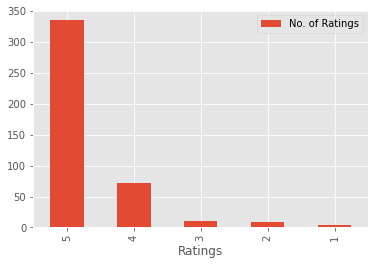

In [100]:
class information:
    
    def rating_info(self):
        y=dataset[dataset['variation']==x]['rating'].value_counts()
        y=pd.DataFrame(y)
        y.index.name ='Ratings'
        y.rename(columns = {'rating':'No. of Ratings'}, inplace = True)
        print(y)
        print('-------------------------------------------------')
        print('Bar graph showing Ratings info of',x,'device')
        y.plot.bar()
        
    def review_info(self):
        s=dataset[dataset['variation']==x]['feedback'].value_counts()
        s=pd.DataFrame(s)
        s.index.name ='Reviews'
        s.rename(columns = {'feedback':'NO OF feedbacks'}, inplace = True)
        print(s)
        print('-------------------------------------------------')
        print('Bar graph showing Reviews info of',x,'device')
        s.plot.bar()

p1=information()

print('Here is the list of devices:\n')
print(a1,'\n')

x=input('Enter the device name:')
l=input('Enter *R* for rating info and *F* for review info!:')
print() 

if(l=='R'):
    p1.rating_info()

elif(l=='F'):
    p1.review_info()

else:
    print('Please press the right character!!')